## Project for COMP 499 - Data Analytics

## Steven Zanga

**Questions:**
I will be examining the changes to the car in order to determine if these changes have a direct impact on faster laptimes the following year. I will also be using driver performance data to try and predict a drivers final position based on their position in qualifying. 

## Data Retrieval and Standard Descriptive Analysis

My Dataset that I found consists of 10 CSV files containing racing data from 1950 to 2017. This data includes:

1. Circuits: **Description about the location of each track that has been included in the Formula 1 circuit since 1950.**

2. Constructor Results: **Results based on Constructor (Team)**

3. Drivers: **Description about every driver that has every raced in the Formula 1 circuit since 1950**

4. Driver Standings **Driver Standings in each year since 1950**

5. Lap Times **Laptimes of every driver, from every race**

6. Pit Stops **Amount of pitstop and the time the pitstop took**

7. Qualifying **Qualifying position of each racer, from every race**

8. Races **Each race, at every location, winner, fastest lap, winning team**

9. Results **Results from each race**

10. Seasons **Results at the end of each season**

**This Dataset was found at: https://www.kaggle.com/cjgdev/formula-1-race-data-19502017**

As I mentioned previously, I want to see if there is a correlation between fastest lap times and changes made to the car. A historical list of all changes made to Formula 1 cars can be found here: https://en.wikipedia.org/wiki/History_of_Formula_One_regulations

## Data Wrangling - Cleaning the data

The main dataset that I will be using is the Results.CSV, however currently it contains an abundance of NaN values so we need to clean it up to make it actually usable. 

In [15]:
import pandas as pd
results = pd.read_csv("./data/results.csv")
results.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22.0,1,1.0,1,1,10.0,58,34:50.6,5690616.0,39.0,2.0,01:27.5,218.3,1
1,2,18,2,2,3.0,5,2.0,2,2,8.0,58,5.478,5696094.0,41.0,3.0,01:27.7,217.586,1
2,3,18,3,3,7.0,7,3.0,3,3,6.0,58,8.163,5698779.0,41.0,5.0,01:28.1,216.719,1
3,4,18,4,4,5.0,11,4.0,4,4,5.0,58,17.181,5707797.0,58.0,7.0,01:28.6,215.464,1
4,5,18,5,1,23.0,3,5.0,5,5,4.0,58,18.014,5708630.0,43.0,1.0,01:27.4,218.385,1


In [16]:
results['fastestLapTime']

0        01:27.5
1        01:27.7
2        01:28.1
3        01:28.6
4        01:27.4
5        01:29.6
6        01:29.5
7        01:27.9
8        01:28.8
9        01:29.6
10       01:30.9
11       01:31.4
12       01:28.2
13       01:29.5
14       01:29.3
15       01:32.0
16           NaN
17           NaN
18           NaN
19           NaN
20           NaN
21       01:28.7
22       01:35.4
23       01:35.9
24       01:35.9
25       01:36.1
26       01:35.5
27       01:35.4
28       01:36.7
29       01:36.3
          ...   
23747    01:13.6
23748    01:13.3
23749    01:13.7
23750    01:14.8
23751    01:13.5
23752    01:11.9
23753    01:14.7
23754        NaN
23755        NaN
23756        NaN
23757    01:40.7
23758    01:41.5
23759    01:40.8
23760    01:42.3
23761    01:42.0
23762    01:42.4
23763    01:42.7
23764    01:42.6
23765    01:43.4
23766    01:43.0
23767    01:42.4
23768    01:44.0
23769    01:43.9
23770    01:43.9
23771    01:43.9
23772    01:43.8
23773    01:43.6
23774    01:42

**Notice the NaN values, there are a lot more where that came from because of the lack of recording devices in the 50s and 60s.**

In [17]:
results.describe()

,resultId,raceId,driverId,constructorId,number,grid,position,positionOrder,points,laps,milliseconds,fastestLap,rank,statusId
count,23777.000000,23777.000000,23777.000000,23777.000000,23771.000000,23777.000000,13227.000000,23777.000000,23777.000000,23777.000000,6.003000e+03,5383.000000,5531.000000,23777.000000
mean,11889.481053,487.203937,226.515961,46.281785,16.965462,11.270303,7.782264,13.081591,1.601403,45.270598,6.303313e+06,41.061676,10.598807,18.242293
std,6864.691322,269.904857,231.386102,56.174091,13.644798,7.346436,4.745105,7.824711,3.665154,30.525404,1.721748e+06,17.156435,6.272457,26.380824
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.474899e+06,2.000000,0.000000,1.000000
25%,5945.000000,273.000000,55.000000,6.000000,7.000000,5.000000,4.000000,7.000000,0.000000,20.000000,5.442948e+06,29.000000,5.000000,1.000000
50%,11889.000000,478.000000,154.000000,25.000000,15.000000,11.000000,7.000000,13.000000,0.000000,52.000000,5.859428e+06,44.000000,11.000000,11.000000
75%,17833.000000,718.000000,314.000000,57.000000,23.000000,17.000000,11.000000,19.000000,1.000000,66.000000,6.495440e+06,53.000000,16.000000,16.000000
max,23781.000000,988.000000,843.000000,210.000000,208.000000,34.000000,33.000000,39.000000,50.000000,200.000000,1.509054e+07,78.000000,24.000000,136.000000


In [18]:
results.count()

resultId           23777
raceId             23777
driverId           23777
constructorId      23777
number             23771
grid               23777
position           13227
positionText       23777
positionOrder      23777
points             23777
laps               23777
time                6004
milliseconds        6003
fastestLap          5383
rank                5531
fastestLapTime      5383
fastestLapSpeed     5383
statusId           23777
dtype: int64

In [19]:
# We can check how many null values we have by using the following: 
results.isnull().sum()

resultId               0
raceId                 0
driverId               0
constructorId          0
number                 6
grid                   0
position           10550
positionText           0
positionOrder          0
points                 0
laps                   0
time               17773
milliseconds       17774
fastestLap         18394
rank               18246
fastestLapTime     18394
fastestLapSpeed    18394
statusId               0
dtype: int64

In [20]:
results.dropna(inplace=True) # Drop all data where there exists a NaN in the row. 
results.isnull().sum()

resultId           0
raceId             0
driverId           0
constructorId      0
number             0
grid               0
position           0
positionText       0
positionOrder      0
points             0
laps               0
time               0
milliseconds       0
fastestLap         0
rank               0
fastestLapTime     0
fastestLapSpeed    0
statusId           0
dtype: int64

In [21]:
results['fastestLapTime']

0        01:27.5
1        01:27.7
2        01:28.1
3        01:28.6
4        01:27.4
22       01:35.4
23       01:35.9
24       01:35.9
25       01:36.1
26       01:35.5
27       01:35.4
28       01:36.7
29       01:36.3
30       01:36.2
31       01:35.7
32       01:37.0
44       01:33.6
45       01:33.7
46       01:33.8
47       01:33.6
48       01:33.2
49       01:34.2
50       01:34.3
51       01:34.1
52       01:34.8
53       01:35.2
54       01:34.9
66       01:21.7
67       01:21.8
68       01:22.0
          ...   
23684    01:35.3
23685    01:35.3
23697    01:38.8
23698    01:38.8
23699    01:37.8
23700    01:38.1
23701    01:37.8
23702    01:40.5
23703    01:40.5
23717    01:18.9
23718    01:19.4
23719    01:20.1
23720    01:18.8
23737    01:12.5
23738    01:12.5
23739    01:12.5
23740    01:11.8
23741    01:11.0
23742    01:12.0
23743    01:13.5
23744    01:13.5
23745    01:13.1
23757    01:40.7
23758    01:41.5
23759    01:40.8
23760    01:42.3
23761    01:42.0
23762    01:42

In [22]:
results.count()

resultId           2604
raceId             2604
driverId           2604
constructorId      2604
number             2604
grid               2604
position           2604
positionText       2604
positionOrder      2604
points             2604
laps               2604
time               2604
milliseconds       2604
fastestLap         2604
rank               2604
fastestLapTime     2604
fastestLapSpeed    2604
statusId           2604
dtype: int64

Our Results are all cleaned and ready to be used!


In [24]:
# Our Data Types
results.dtypes

resultId             int64
raceId               int64
driverId             int64
constructorId        int64
number             float64
grid                 int64
position           float64
positionText        object
positionOrder        int64
points             float64
laps                 int64
time                object
milliseconds       float64
fastestLap         float64
rank               float64
fastestLapTime      object
fastestLapSpeed     object
statusId             int64
dtype: object

## Data Integration & Data Enrichment

**Combining the Ids from each CSV file**

So if you look below, you can see we have a bunch of labels such as: 'RaceId' and 'ConstructorId' ..etc. These IDs correspond to data linked on the other CSV files, so in order to prepare my data for machine learning, I need to merge all these files together and then delete the columns of the data I don't need! 

**My approach to integrating data**

Now my screen is only 13 inches so it will be a bit difficult to manage my data in a table with more than 30 columns. So my approach will be to merge each table individually, then delete the redundant columns, and repeat until all files are merged together and we have all the data we need. Now in order to save myself from making mistakes, I saved every merge to a new variable, I will use each variable as a checkpoint so that if I screw up, I don't have to restart from the beginning. The Final Variable will be called **FinalData**.

In [25]:
results.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22.0,1,1.0,1,1,10.0,58,34:50.6,5690616.0,39.0,2.0,01:27.5,218.3,1
1,2,18,2,2,3.0,5,2.0,2,2,8.0,58,5.478,5696094.0,41.0,3.0,01:27.7,217.586,1
2,3,18,3,3,7.0,7,3.0,3,3,6.0,58,8.163,5698779.0,41.0,5.0,01:28.1,216.719,1
3,4,18,4,4,5.0,11,4.0,4,4,5.0,58,17.181,5707797.0,58.0,7.0,01:28.6,215.464,1
4,5,18,5,1,23.0,3,5.0,5,5,4.0,58,18.014,5708630.0,43.0,1.0,01:27.4,218.385,1


In [27]:
# Reading the Drivers csv File
drivers = pd.read_csv("./data/drivers.csv", encoding = "ISO-8859-1")
drivers.head()

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44.0,HAM,Lewis,Hamilton,07/01/1985,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,NaN,HEI,Nick,Heidfeld,10/05/1977,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6.0,ROS,Nico,Rosberg,27/06/1985,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14.0,ALO,Fernando,Alonso,29/07/1981,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,NaN,KOV,Heikki,Kovalainen,19/10/1981,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen


In [29]:
#Merging the Drivers CSV file and saving it to merge
merge = pd.merge(results, drivers, how="inner", on="driverId")
merge

,resultId,raceId,driverId,constructorId,number_x,grid,position,positionText,positionOrder,points,...,fastestLapSpeed,statusId,driverRef,number_y,code,forename,surname,dob,nationality,url
0,1,18,1,1,22.0,1,1.0,1,1,10.0,...,218.3,1,hamilton,44.0,HAM,Lewis,Hamilton,07/01/1985,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,27,19,1,1,22.0,9,5.0,5,5,4.0,...,209.033,1,hamilton,44.0,HAM,Lewis,Hamilton,07/01/1985,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
2,69,21,1,1,22.0,5,3.0,3,3,6.0,...,204.323,1,hamilton,44.0,HAM,Lewis,Hamilton,07/01/1985,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
3,90,22,1,1,22.0,3,2.0,2,2,8.0,...,222.085,1,hamilton,44.0,HAM,Lewis,Hamilton,07/01/1985,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
4,109,23,1,1,22.0,3,1.0,1,1,10.0,...,153.152,1,hamilton,44.0,HAM,Lewis,Hamilton,07/01/1985,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
5,158,25,1,1,22.0,13,10.0,10,10,0.0,...,205.022,1,hamilton,44.0,HAM,Lewis,Hamilton,07/01/1985,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
6,169,26,1,1,22.0,4,1.0,1,1,10.0,...,199.398,1,hamilton,44.0,HAM,Lewis,Hamilton,07/01/1985,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
7,189,27,1,1,22.0,1,1.0,1,1,10.0,...,216.552,1,hamilton,44.0,HAM,Lewis,Hamilton,07/01/1985,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
8,213,28,1,1,22.0,1,5.0,5,5,4.0,...,193.533,1,hamilton,44.0,HAM,Lewis,Hamilton,07/01/1985,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
9,230,29,1,1,22.0,2,2.0,2,2,8.0,...,197.285,1,hamilton,44.0,HAM,Lewis,Hamilton,07/01/1985,British,http://en.wikipedia.org/wiki/Lewis_Hamilton


In [31]:
# Let's drop columns we don't need to clean it up a little bit. This is me testing dropping 'points' so that I dont
# screw up
merge = merge.drop('points', axis = 1)
merge.head()

,resultId,raceId,driverId,constructorId,number_x,grid,position,positionText,positionOrder,laps,...,fastestLapSpeed,statusId,driverRef,number_y,code,forename,surname,dob,nationality,url
0,1,18,1,1,22.0,1,1.0,1,1,58,...,218.3,1,hamilton,44.0,HAM,Lewis,Hamilton,07/01/1985,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,27,19,1,1,22.0,9,5.0,5,5,56,...,209.033,1,hamilton,44.0,HAM,Lewis,Hamilton,07/01/1985,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
2,69,21,1,1,22.0,5,3.0,3,3,66,...,204.323,1,hamilton,44.0,HAM,Lewis,Hamilton,07/01/1985,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
3,90,22,1,1,22.0,3,2.0,2,2,58,...,222.085,1,hamilton,44.0,HAM,Lewis,Hamilton,07/01/1985,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
4,109,23,1,1,22.0,3,1.0,1,1,76,...,153.152,1,hamilton,44.0,HAM,Lewis,Hamilton,07/01/1985,British,http://en.wikipedia.org/wiki/Lewis_Hamilton


In [32]:
# Dropping columns: 'position, laps, url, nationality, dob, forename, code, number_y'
merge = merge.drop(['position', 'laps', 'url', 'nationality', 'dob', 'forename', 'code', 'number_y'], axis = 1)
merge.head()

,resultId,raceId,driverId,constructorId,number_x,grid,positionText,positionOrder,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId,driverRef,surname
0,1,18,1,1,22.0,1,1,1,34:50.6,5690616.0,39.0,2.0,01:27.5,218.3,1,hamilton,Hamilton
1,27,19,1,1,22.0,9,5,5,46.548,5525103.0,53.0,3.0,01:35.5,209.033,1,hamilton,Hamilton
2,69,21,1,1,22.0,5,3,3,4.187,5903238.0,20.0,3.0,01:22.0,204.323,1,hamilton,Hamilton
3,90,22,1,1,22.0,3,2,2,3.779,5213230.0,31.0,2.0,01:26.5,222.085,1,hamilton,Hamilton
4,109,23,1,1,22.0,3,1,1,00:42.7,7242742.0,71.0,6.0,01:18.5,153.152,1,hamilton,Hamilton


In [33]:
# reading the status csv file
status = pd.read_csv("./data/status.csv", encoding = "ISO-8859-1")
status.head()

,statusId,status
0,1,Finished
1,2,Disqualified
2,3,Accident
3,4,Collision
4,5,Engine


In [36]:
# merging merge and status, saving it to d1
d1 = pd.merge(merge, status, how="inner", on='statusId')
d1.head()

,resultId,raceId,driverId,constructorId,number_x,grid,positionText,positionOrder,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId,driverRef,surname,status
0,1,18,1,1,22.0,1,1,1,34:50.6,5690616.0,39.0,2.0,01:27.5,218.3,1,hamilton,Hamilton,Finished
1,27,19,1,1,22.0,9,5,5,46.548,5525103.0,53.0,3.0,01:35.5,209.033,1,hamilton,Hamilton,Finished
2,69,21,1,1,22.0,5,3,3,4.187,5903238.0,20.0,3.0,01:22.0,204.323,1,hamilton,Hamilton,Finished
3,90,22,1,1,22.0,3,2,2,3.779,5213230.0,31.0,2.0,01:26.5,222.085,1,hamilton,Hamilton,Finished
4,109,23,1,1,22.0,3,1,1,00:42.7,7242742.0,71.0,6.0,01:18.5,153.152,1,hamilton,Hamilton,Finished


In [38]:
# droping columns: 'driverId, statusId, driverRef' and saving it to data.
data = d1.drop(['driverId', 'statusId', 'driverRef'], axis = 1)
data.head()

,resultId,raceId,constructorId,number_x,grid,positionText,positionOrder,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,surname,status
0,1,18,1,22.0,1,1,1,34:50.6,5690616.0,39.0,2.0,01:27.5,218.3,Hamilton,Finished
1,27,19,1,22.0,9,5,5,46.548,5525103.0,53.0,3.0,01:35.5,209.033,Hamilton,Finished
2,69,21,1,22.0,5,3,3,4.187,5903238.0,20.0,3.0,01:22.0,204.323,Hamilton,Finished
3,90,22,1,22.0,3,2,2,3.779,5213230.0,31.0,2.0,01:26.5,222.085,Hamilton,Finished
4,109,23,1,22.0,3,1,1,00:42.7,7242742.0,71.0,6.0,01:18.5,153.152,Hamilton,Finished


In [40]:
# reading races csv, droping columns: 'round, circuitId, date, time, url'
races = pd.read_csv("./data/races.csv", encoding = "ISO-8859-1")
races = races.drop(['round', 'circuitId', 'date', 'time', 'url'], axis = 1)
races.head()

,raceId,year,name
0,1,2009,Australian Grand Prix
1,2,2009,Malaysian Grand Prix
2,3,2009,Chinese Grand Prix
3,4,2009,Bahrain Grand Prix
4,5,2009,Spanish Grand Prix


In [41]:
# merging data and races, saving it to cleanedData
cleanedData = pd.merge(data, races, how='inner', on='raceId')
cleanedData.head()

,resultId,raceId,constructorId,number_x,grid,positionText,positionOrder,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,surname,status,year,name
0,1,18,1,22.0,1,1,1,34:50.6,5690616.0,39.0,2.0,01:27.5,218.3,Hamilton,Finished,2008,Australian Grand Prix
1,2,18,2,3.0,5,2,2,5.478,5696094.0,41.0,3.0,01:27.7,217.586,Heidfeld,Finished,2008,Australian Grand Prix
2,3,18,3,7.0,7,3,3,8.163,5698779.0,41.0,5.0,01:28.1,216.719,Rosberg,Finished,2008,Australian Grand Prix
3,4,18,4,5.0,11,4,4,17.181,5707797.0,58.0,7.0,01:28.6,215.464,Alonso,Finished,2008,Australian Grand Prix
4,5,18,1,23.0,3,5,5,18.014,5708630.0,43.0,1.0,01:27.4,218.385,Kovalainen,Finished,2008,Australian Grand Prix


In [47]:
# reading constructor csv, droping columns: constructorRef, nationality, url, saving it to d2.
constructors = pd.read_csv("./data/constructors.csv", encoding = "ISO-8859-1")
constructors = constructors.drop(['constructorRef', 'nationality', 'url', 'Unnamed: 5'], axis = 1)
d2 = pd.merge(cleanedData, constructors, how='inner', on = 'constructorId')
d2.head()

,resultId,raceId,constructorId,number_x,grid,positionText,positionOrder,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,surname,status,year,name_x,name_y
0,1,18,1,22.0,1,1,1,34:50.6,5690616.0,39.0,2.0,01:27.5,218.3,Hamilton,Finished,2008,Australian Grand Prix,McLaren
1,5,18,1,23.0,3,5,5,18.014,5708630.0,43.0,1.0,01:27.4,218.385,Kovalainen,Finished,2008,Australian Grand Prix,McLaren
2,27,19,1,22.0,9,5,5,46.548,5525103.0,53.0,3.0,01:35.5,209.033,Hamilton,Finished,2008,Malaysian Grand Prix,McLaren
3,25,19,1,23.0,8,3,3,38.45,5517005.0,19.0,7.0,01:35.9,208.031,Kovalainen,Finished,2008,Malaysian Grand Prix,McLaren
4,69,21,1,22.0,5,3,3,4.187,5903238.0,20.0,3.0,01:22.0,204.323,Hamilton,Finished,2008,Spanish Grand Prix,McLaren


In [51]:
# Dropping some Data and we are done! Saved to FinalData.
FinalData = d2.drop(['constructorId','raceId','number_x', 'positionText', 'positionText', 'milliseconds', 'time', 'rank'], axis = 1)
FinalData # WE ARE DONE CLEANING, This data is now ready for machine learning. 

,resultId,grid,positionOrder,fastestLap,fastestLapTime,fastestLapSpeed,surname,status,year,name_x,name_y
0,1,1,1,39.0,01:27.5,218.3,Hamilton,Finished,2008,Australian Grand Prix,McLaren
1,5,3,5,43.0,01:27.4,218.385,Kovalainen,Finished,2008,Australian Grand Prix,McLaren
2,27,9,5,53.0,01:35.5,209.033,Hamilton,Finished,2008,Malaysian Grand Prix,McLaren
3,25,8,3,19.0,01:35.9,208.031,Kovalainen,Finished,2008,Malaysian Grand Prix,McLaren
4,69,5,3,20.0,01:22.0,204.323,Hamilton,Finished,2008,Spanish Grand Prix,McLaren
5,90,3,2,31.0,01:26.5,222.085,Hamilton,Finished,2008,Turkish Grand Prix,McLaren
6,109,3,1,71.0,01:18.5,153.152,Hamilton,Finished,2008,Monaco Grand Prix,McLaren
7,116,4,8,74.0,01:17.3,155.586,Kovalainen,Finished,2008,Monaco Grand Prix,McLaren
8,158,13,10,40.0,01:17.5,205.022,Hamilton,Finished,2008,French Grand Prix,McLaren
9,152,10,4,46.0,01:17.1,205.87,Kovalainen,Finished,2008,French Grand Prix,McLaren


In [54]:
FinalData.to_csv('FinalData.csv', sep=',') # Saving the DF incase something happens. 

In [55]:
# No Nulls Found, so all my data is cleaned. 
FinalData.isnull().sum()

resultId           0
grid               0
positionOrder      0
fastestLap         0
fastestLapTime     0
fastestLapSpeed    0
surname            0
status             0
year               0
name_x             0
name_y             0
dtype: int64

In [3]:
import pandas as pd
FinalData = pd.read_csv('./FinalData.csv')
FinalData.sample(20)

,Unnamed: 0,resultId,grid,positionOrder,fastestLap,fastestLapTime,fastestLapSpeed,surname,status,year,name_x,name_y
946,946,21256,8,1,53.0,01:41.7,196.25,Alonso,Finished,2012,Malaysian Grand Prix,Ferrari
1198,1198,1424,6,10,5.0,01:23.6,249.507,Schumacher,Finished,2005,Italian Grand Prix,Ferrari
1273,1273,354,10,6,32.0,01:14.1,209.465,Glock,Finished,2008,Brazilian Grand Prix,Toyota
1843,1843,22269,8,8,56.0,01:19.4,197.73,Vergne,Finished,2014,Canadian Grand Prix,Toro Rosso
2187,2187,22501,2,2,62.0,01:13.6,210.895,Hamilton,Finished,2014,Brazilian Grand Prix,Mercedes
2104,2104,21068,8,5,46.0,01:27.4,238.607,Schumacher,Finished,2011,Italian Grand Prix,Mercedes
102,102,20854,6,6,47.0,01:31.2,210.786,Button,Finished,2011,Turkish Grand Prix,McLaren
2542,2542,23346,22,12,47.0,01:27.8,176.686,Ocon,Finished,2016,Brazilian Grand Prix,Manor Marussia
1119,1119,722,1,2,71.0,01:12.6,213.716,Massa,Finished,2007,Brazilian Grand Prix,Ferrari
2480,2480,21964,11,11,45.0,01:26.9,239.853,RÌ_ikkÌ¦nen,Finished,2013,Italian Grand Prix,Lotus F1


## Question 1: What is the likelyness that a driver will finish in a desired position if they finish 1st in qualifying?

**Podium positions**

In [61]:
# 1 grid, 1 Position = 140 / 230 = 60.86% chance of finishing 1
(FinalData[(FinalData['grid'] == 1) & (FinalData['positionOrder'] == 1)].shape[0]/230) * 100

60.86956521739131

In [62]:
# 1 grid, 2 Position = 45 / 230 = 19.56% chance of finishing 2
(FinalData[(FinalData['grid'] == 1) & (FinalData['positionOrder'] == 2)].shape[0]/230) * 100

19.565217391304348

In [63]:
# 1 grid, 3 Position = 23 / 230 = 10% chance of finishing 3
FinalData[(FinalData['grid'] == 1) & (FinalData['positionOrder'] == 3)].shape[0]/230*100

10.0

**Non Podiums - In points**

In [64]:
# 1 grid, 4 Position = 8 / 230 = 3.47% chance of finishing 4
FinalData[(FinalData['grid'] == 1) & (FinalData['positionOrder'] == 4)].shape[0]/230*100

3.4782608695652173

In [65]:
# 1 grid, 5 Position = 4 / 230 = 1.74% chance of finishing 5
FinalData[(FinalData['grid'] == 1) & (FinalData['positionOrder'] == 5)].shape[0]/230*100

1.7391304347826086

In [66]:
# 1 grid, 6 Position = 3 / 230 = 1.30% chance of finishing 6
FinalData[(FinalData['grid'] == 1) & (FinalData['positionOrder'] == 6)].shape[0]/230*100

1.3043478260869565

In [67]:
# 1 grid, 7 Position = 1 / 230 = .43% chance of finishing 7
FinalData[(FinalData['grid'] == 1) & (FinalData['positionOrder'] == 7)].shape[0]/230*100

0.43478260869565216

In [68]:
# 1 grid, 8 Position = 2 / 230 = .86% chance of finishing 8
FinalData[(FinalData['grid'] == 1) & (FinalData['positionOrder'] == 8)].shape[0]/230*100

0.8695652173913043

In [69]:
# 1 grid, 9 Position = 2 / 230 = .86% chance of finishing 9
FinalData[(FinalData['grid'] == 1) & (FinalData['positionOrder'] == 9)].shape[0]/230*100

0.8695652173913043

**Given a first place qualification:**

**99.08% chance that a driver will finish within points range [1, 10]**

**< 1% chance that a driver will finish out of points range**

**90% chance of finishing on the podium**

In [59]:
FinalData[(FinalData['grid'] == 1)].shape[0]

230

In [97]:
# Simple automation for finding data for my bar chart
# First Place on Grid: 
for i in range(1,15):
    print(FinalData[(FinalData['grid'] == 1) & (FinalData['positionOrder'] == i)].shape[0])

140
45
23
8
4
3
1
2
2
0
0
1
1
0


In [96]:
# Simple automation for finding data for my bar chart
# Second Place on Grid: 
for i in range(1,15):
    print(FinalData[(FinalData['grid'] == 2) & (FinalData['positionOrder'] == i)].shape[0])

65
62
38
19
15
3
7
5
6
0
1
0
1
1


In [95]:
# Simple automation for finding data for my bar chart
# Third Place on Grid: 
for i in range(1,15):
    print(FinalData[(FinalData['grid'] == 3) & (FinalData['positionOrder'] == i)].shape[0])

21
49
56
31
25
9
6
7
2
5
1
1
0
1


In [99]:
# Simple automation for finding data for my bar chart
# Fourth Place on Grid: 
for i in range(1,15):
    print(FinalData[(FinalData['grid'] == 4) & (FinalData['positionOrder'] == i)].shape[0])

12
39
32
42
26
24
15
10
5
0
1
0
0
1


In [120]:
# Simple automation for finding data for my bar chart
# Fifth Place on Grid: 
for i in range(1,15):
    print(FinalData[(FinalData['grid'] == 5) & (FinalData['positionOrder'] == i)].shape[0])

7
21
31
45
30
25
13
6
2
10
4
0
0
1


In [138]:
# Simple automation for finding data for my bar chart
# Sixth Place on Grid: 
for i in range(1,11):
    print(FinalData[(FinalData['grid'] == 6) & (FinalData['positionOrder'] == i)].shape[0])

6
11
24
31
31
29
17
9
7
3


In [146]:
# Simple automation for finding data for my bar chart
# Seventh Place on Grid: 
for i in range(1,15):
    print(FinalData[(FinalData['grid'] == 7) & (FinalData['positionOrder'] == i)].shape[0])

3
9
13
10
28
29
19
18
11
7
3
6
5
0


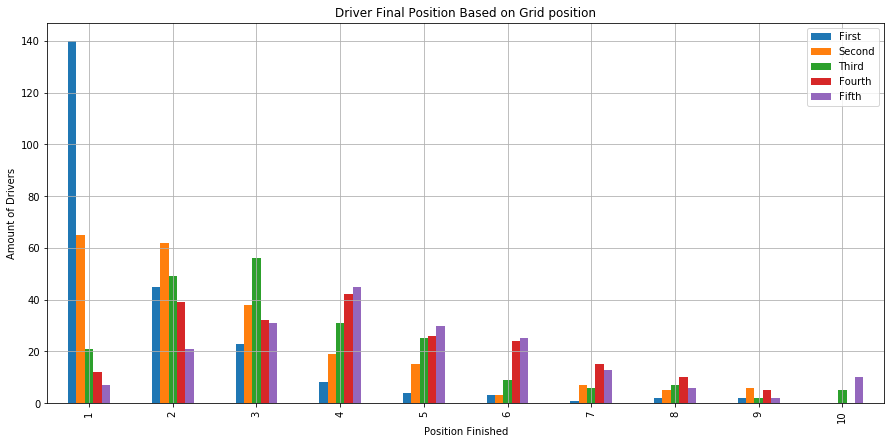

In [151]:
import matplotlib.pyplot as plt
First = [140,45,23,8,4,3,1,2,2,0]
Second =[65,62,38,19,15,3,7,5,6,0]
Third = [21,49,56,31,25,9,6,7,2,5]
Fourth =[12,39,32,42,26,24,15,10,5,0]
Fifth = [7, 21, 31, 45, 30, 25, 13, 6, 2, 10]
Sixth = [6,11,24,31,31,29,17,9,7,3]
Seventh = [3,9,13,10,28,29,19,18,11]

#Not used for bar chat


index = ['1','2','3','4','5','6','7','8','9','10']

barPlot = pd.DataFrame({
    'First': First,
    'Second': Second,
    'Third':Third,
    'Fourth':Fourth,
    'Fifth': Fifth
    
}, index = index)

barPlot.plot.bar(title='Driver Final Position Based on Grid position', figsize=(15,7), grid = True)
plt.xlabel('Position Finished')
plt.ylabel('Amount of Drivers')
plt.show()

In [133]:
# Checking if Data is Normal Distribution.. 
FourthDF = pd.DataFrame({
    'Fourth' : Fourth
})

FourthDF.skew(axis = 0) # Which gives us Symmetric Data! This Distribution is Symmetrix as well... 

Fourth    0.1751
dtype: float64

In [134]:
FifthDF = pd.DataFrame({
    'Fifth' : Fifth
})

FifthDF.skew(axis = 0) # Which gives us Symmetric Data!

Fifth    0.592572
dtype: float64

In [135]:
ThirdDF = pd.DataFrame({
    'Third' : Third
})

ThirdDF.skew(axis = 0) # Which gives us Moderately Skewed!

Third    0.909016
dtype: float64

In [142]:
SixthDF = pd.DataFrame({
    'Sixth' : Sixth
})

SixthDF.skew(axis = 0) # Which gives us Symmetric!

Sixth    0.247902
dtype: float64

In [152]:
SeventhDF = pd.DataFrame({
    'Seventh' : Seventh
})

SeventhDF.skew(axis = 0) # Which gives us Symmetric!

Seventh    0.448699
dtype: float64

## Question 2: If you qualify 1, 2 or 3: what is the chance you will finish on the podium? 

In [76]:
FinalData[(FinalData['grid'] == 1) & (FinalData['positionOrder'] == 1)].shape[0]/230*100

60.86956521739131

In [78]:
FinalData[(FinalData['grid'] == 1) & (FinalData['positionOrder'] == 2)].shape[0]/230*100

19.565217391304348

In [77]:
FinalData[(FinalData['grid'] == 1) & (FinalData['positionOrder'] == 3)].shape[0]/230*100

10.0

In [86]:
FinalData[(FinalData['grid'] == 1) & (FinalData['positionOrder'] > 3)].shape[0]/230*100

9.565217391304348

**Given a first place qualification:**

**drivers have a 90.45% chance of finishing on the podium and a 9.55% chance of missing podium**

In [70]:
FinalData[(FinalData['grid'] == 2) & (FinalData['positionOrder'] == 1)].shape[0]/230*100

28.26086956521739

In [71]:
FinalData[(FinalData['grid'] == 2) & (FinalData['positionOrder'] == 2)].shape[0]/230*100

26.956521739130434

In [72]:
FinalData[(FinalData['grid'] == 2) & (FinalData['positionOrder'] == 3)].shape[0]/230*100

16.52173913043478

In [85]:
FinalData[(FinalData['grid'] == 2) & (FinalData['positionOrder'] > 3)].shape[0]/230*100

25.217391304347824

**Given a second place qualification:**

**drivers have a 71.73% chance of finishing on the podium and a 25.21% chance of missing podium**

In [73]:
FinalData[(FinalData['grid'] == 3) & (FinalData['positionOrder'] == 1)].shape[0]/230*100

9.130434782608695

In [74]:
FinalData[(FinalData['grid'] == 3) & (FinalData['positionOrder'] == 2)].shape[0]/230*100

21.304347826086957

In [75]:
FinalData[(FinalData['grid'] == 3) & (FinalData['positionOrder'] == 3)].shape[0]/230*100

24.347826086956523

In [84]:
FinalData[(FinalData['grid'] == 3) & (FinalData['positionOrder'] > 3)].shape[0]/230*100

38.26086956521739

**Given a third place qualification:**

**drivers have a 54.77% chance of finishing on the podium and a 38.23% chance of missing podium**

## Next Section: Between 2013 and 2014, a decision was made to manipulate the formula of the cars. Starting in 2014, there would be a new V6 engine with 1600cc / 8 gearbox. 

CC is the displacement volume of the engine, so it means that that the engine has more cylinders and a higher swept volume which directly translates into horse power and torque of the vehicle. 

https://bleacherreport.com/articles/2003467-are-2014-formula-1-cars-slower-analysing-lap-times-at-australian-grand-prix

Between 2013 and 14 there was a 1.77 second drop in fastest average laptime between racers that stayed on the same team. 

**Sebastian Vettel: Difference in Race times between 2013 and 2014 average in each race: -2.29 seconds**

**Fernando Alonso: Difference in Race times between 2013 and 2014 average in each race: -2.07 seconds**

**Nico Rosberg: Difference in Race times between 2013 and 2014 average in each race: -1.78 seconds**

**Felipe Massa: Difference in Race times between 2013 and 2014 average in each race: -0.92 seconds**


In [39]:
# Checking the Driver's average lap time Below

In [41]:
FinalData[((FinalData['year'] == 2013) | (FinalData['year'] == 2014)) & ((FinalData['surname'] == 'Vettel'))].sort_values(by=['surname','name_x']).head(6)

,Unnamed: 0,resultId,grid,positionOrder,fastestLap,fastestLapTime,fastestLapSpeed,surname,status,year,name_x,name_y
1487,1487,22064,2,1,51.0,01:43.9,192.451,Vettel,Finished,2013,Abu Dhabi Grand Prix,Red Bull
1518,1518,22525,19,8,51.0,01:45.6,189.427,Vettel,Finished,2014,Abu Dhabi Grand Prix,Red Bull
1464,1464,21714,1,3,42.0,01:30.4,211.16,Vettel,Finished,2013,Australian Grand Prix,Red Bull
1469,1469,21778,2,1,55.0,01:37.0,200.938,Vettel,Finished,2013,Bahrain Grand Prix,Red Bull
1493,1493,22179,10,6,18.0,01:39.3,196.181,Vettel,Finished,2014,Bahrain Grand Prix,Red Bull
1480,1480,21932,2,1,40.0,01:50.8,227.657,Vettel,Finished,2013,Belgian Grand Prix,Red Bull


In [43]:
FinalData[((FinalData['year'] == 2013) | (FinalData['year'] == 2014)) & ((FinalData['surname'] == 'Alonso'))].sort_values(by=['surname','name_x']).head(6)

,Unnamed: 0,resultId,grid,positionOrder,fastestLap,fastestLapTime,fastestLapSpeed,surname,status,year,name_x,name_y
994,994,22068,10,5,55.0,01:43.4,193.305,Alonso,Finished,2013,Abu Dhabi Grand Prix,Ferrari
1021,1021,22526,8,9,45.0,01:47.4,186.126,Alonso,Finished,2014,Abu Dhabi Grand Prix,Ferrari
970,970,21713,5,2,53.0,01:29.6,213.162,Alonso,Finished,2013,Australian Grand Prix,Ferrari
1167,1167,22133,5,4,57.0,01:33.2,204.867,Alonso,Finished,2014,Australian Grand Prix,Ferrari
1007,1007,22288,4,5,58.0,01:12.6,214.527,Alonso,Finished,2014,Austrian Grand Prix,Ferrari
975,975,21785,3,8,41.0,01:37.2,200.436,Alonso,Finished,2013,Bahrain Grand Prix,Ferrari


In [38]:
FinalData[((FinalData['year'] == 2013) | (FinalData['year'] == 2014)) & ((FinalData['surname'] == 'Rosberg'))].sort_values(by=['surname','name_x']).head(6)

,Unnamed: 0,resultId,grid,positionOrder,fastestLap,fastestLapTime,fastestLapSpeed,surname,status,year,name_x,name_y
2156,2156,22066,3,3,51.0,01:44.5,191.41,Rosberg,Finished,2013,Abu Dhabi Grand Prix,Mercedes
2313,2313,22130,3,1,19.0,01:32.5,206.436,Rosberg,Finished,2014,Australian Grand Prix,Mercedes
2172,2172,22284,3,1,50.0,01:12.6,214.518,Rosberg,Finished,2014,Austrian Grand Prix,Mercedes
2135,2135,21786,1,9,48.0,01:37.6,199.647,Rosberg,Finished,2013,Bahrain Grand Prix,Mercedes
2164,2164,22175,1,2,49.0,01:37.0,200.816,Rosberg,Finished,2014,Bahrain Grand Prix,Mercedes
2146,2146,21935,4,4,39.0,01:51.6,225.971,Rosberg,Finished,2013,Belgian Grand Prix,Mercedes


In [49]:
FinalData[((FinalData['year'] == 2013) | (FinalData['year'] == 2014)) & ((FinalData['surname'] == 'Massa'))].sort_values(by=['surname','name_x']).head(6)

,Unnamed: 0,resultId,grid,positionOrder,fastestLap,fastestLapTime,fastestLapSpeed,surname,status,year,name_x,name_y
514,514,22519,4,2,47.0,01:44.8,190.738,Massa,Finished,2014,Abu Dhabi Grand Prix,Williams
995,995,22071,7,8,52.0,01:45.4,189.615,Massa,Finished,2013,Abu Dhabi Grand Prix,Ferrari
971,971,21715,4,4,38.0,01:30.2,211.558,Massa,Finished,2013,Australian Grand Prix,Ferrari
497,497,22287,1,4,63.0,01:12.6,214.553,Massa,Finished,2014,Austrian Grand Prix,Williams
493,493,22180,7,7,40.0,01:39.3,196.26,Massa,Finished,2014,Bahrain Grand Prix,Williams
976,976,21792,4,15,42.0,01:38.8,197.12,Massa,Finished,2013,Bahrain Grand Prix,Ferrari


In [62]:
FinalData[((FinalData['year'] == 2013) | (FinalData['year'] == 2014)) & ((FinalData['surname'] == 'Button'))].sort_values(by=['surname','name_x']).head(6)

,Unnamed: 0,resultId,grid,positionOrder,fastestLap,fastestLapTime,fastestLapSpeed,surname,status,year,name_x,name_y
169,169,22075,12,12,43.0,01:46.3,188.03,Button,Finished,2013,Abu Dhabi Grand Prix,McLaren
192,192,22522,6,5,47.0,01:46.7,187.32,Button,Finished,2014,Abu Dhabi Grand Prix,McLaren
148,148,21720,10,9,41.0,01:30.2,211.654,Button,Finished,2013,Australian Grand Prix,McLaren
258,258,22132,10,3,39.0,01:32.9,205.46,Button,Finished,2014,Australian Grand Prix,McLaren
176,176,22294,11,11,60.0,01:12.9,213.752,Button,Finished,2014,Austrian Grand Prix,McLaren
153,153,21787,10,10,49.0,01:37.7,199.33,Button,Finished,2013,Bahrain Grand Prix,McLaren


In [65]:
FinalData[((FinalData['year'] == 2013) | (FinalData['year'] == 2014)) & ((FinalData['surname'] == 'Ricciardo'))].sort_values(by=['surname','name_x']).head(6)

,Unnamed: 0,resultId,grid,positionOrder,fastestLap,fastestLapTime,fastestLapSpeed,surname,status,year,name_x,name_y
1519,1519,22521,20,4,50.0,01:44.5,191.341,Ricciardo,Finished,2014,Abu Dhabi Grand Prix,Red Bull
1500,1500,22291,5,8,55.0,01:13.1,213.161,Ricciardo,Finished,2014,Austrian Grand Prix,Red Bull
1494,1494,22177,13,4,38.0,01:39.3,196.266,Ricciardo,Finished,2014,Bahrain Grand Prix,Red Bull
1640,1640,22373,5,1,44.0,01:53.0,223.187,Ricciardo,Finished,2014,Belgian Grand Prix,Red Bull
1774,1774,21941,19,10,38.0,01:51.0,227.224,Ricciardo,Finished,2013,Belgian Grand Prix,Toro Rosso
1502,1502,22308,8,3,34.0,01:38.5,215.395,Ricciardo,Finished,2014,British Grand Prix,Red Bull


In [71]:
FinalData[((FinalData['year'] == 2013) | (FinalData['year'] == 2014)) & ((FinalData['surname'] == 'Bottas'))].sort_values(by=['surname','name_x']).head(6)

,Unnamed: 0,resultId,grid,positionOrder,fastestLap,fastestLapTime,fastestLapSpeed,surname,status,year,name_x,name_y
515,515,22520,3,3,54.0,01:45.7,189.113,Bottas,Finished,2014,Abu Dhabi Grand Prix,Williams
611,611,22134,15,5,56.0,01:32.6,206.128,Bottas,Finished,2014,Australian Grand Prix,Williams
498,498,22286,2,3,63.0,01:12.6,214.568,Bottas,Finished,2014,Austrian Grand Prix,Williams
476,476,21791,15,14,57.0,01:38.2,198.419,Bottas,Finished,2013,Bahrain Grand Prix,Williams
494,494,22181,3,8,50.0,01:39.8,195.296,Bottas,Finished,2014,Bahrain Grand Prix,Williams
481,481,21946,20,15,31.0,01:52.7,223.754,Bottas,Finished,2013,Belgian Grand Prix,Williams


In [73]:
FinalData[((FinalData['year'] == 2013) | (FinalData['year'] == 2014)) & ((FinalData['surname'] == 'Hamilton'))].sort_values(by=['surname','name_x']).head(6)

,Unnamed: 0,resultId,grid,positionOrder,fastestLap,fastestLapTime,fastestLapSpeed,surname,status,year,name_x,name_y
2155,2155,22070,4,7,47.0,01:45.5,189.586,Hamilton,Finished,2013,Abu Dhabi Grand Prix,Mercedes
2189,2189,22518,2,1,49.0,01:45.6,189.342,Hamilton,Finished,2014,Abu Dhabi Grand Prix,Mercedes
2130,2130,21716,3,5,45.0,01:29.8,212.689,Hamilton,Finished,2013,Australian Grand Prix,Mercedes
2171,2171,22285,9,2,41.0,01:12.2,215.65,Hamilton,Finished,2014,Austrian Grand Prix,Mercedes
2134,2134,21782,9,5,48.0,01:38.2,198.395,Hamilton,Finished,2013,Bahrain Grand Prix,Mercedes
2163,2163,22174,2,1,49.0,01:37.1,200.634,Hamilton,Finished,2014,Bahrain Grand Prix,Mercedes


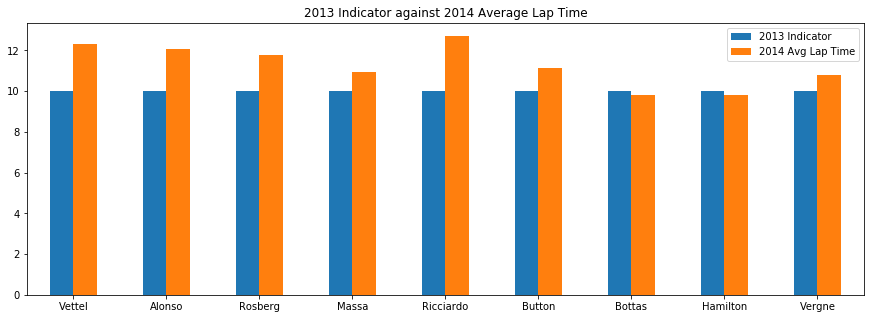

In [157]:
# The chart below signifies a 2014 average lap time versus a 2013 indicator time. 
Initial = [10,10,10,10, 10, 10, 10, 10, 10]
SpeedIn2014 = [12.29, 12.07, 11.78, 10.92, 12.71, 11.12, 9.79, 9.82, 10.77]
index = ['Vettel', 'Alonso', 'Rosberg', 'Massa', 'Ricciardo', 'Button', 'Bottas', 'Hamilton', 'Vergne']
df = pd.DataFrame({'2013 Indicator': Initial, '2014 Avg Lap Time': SpeedIn2014}, index=index)
df.plot.bar(rot=0, figsize=(15,5), title = '2013 Indicator against 2014 Average Lap Time')


**The reason for the cars being slower than last year: https://bleacherreport.com/articles/2003467-are-2014-formula-1-cars-slower-analysing-lap-times-at-australian-grand-prix**

## Linear Regression

using linear regression to figure out the correlation between Grid Position and Final Position.

In [182]:
# Trying to check the correlation between Final Position and Grid Position. 

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Using grid as X and position as y
X = FinalData['grid'].values.reshape(-1,1)
y = FinalData['positionOrder'].values.reshape(-1,1)

# Splitting the Data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [165]:
print(regressor.intercept_)
print(regressor.coef_)

[2.49616411]
[[0.45764567]]


In [186]:
y_pred = regressor.predict(X_test)

predictions = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted' : y_pred.flatten()})
predictions

# Actual Position vs Predicted.

,Actual,Predicted
0,2,2.953810
1,8,8.445558
2,5,5.242038
3,5,5.699684
4,4,5.242038
5,4,4.326747
6,1,3.411455
7,8,7.987912
8,9,6.157329
9,10,6.614975


<function matplotlib.pyplot.show(*args, **kw)>

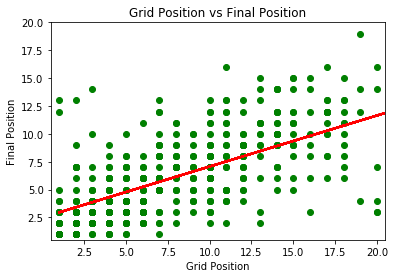

In [245]:
# The problem with using a scatter plot to visualize this data is that there are only a certain amount of positions 
# that drivers can finish.. Between 1 and 20. That means that the graph will be very uniform.
plt.scatter(X_test, y_test, color='green')
plt.plot(X_test, y_pred, color = 'red', linewidth = 2)
plt.title('Grid Position vs Final Position')
plt.xlabel('Grid Position')
plt.ylabel('Final Position')
plt.ylim(0.5, 20)
plt.xlim(0.5, 20.5)
plt.show

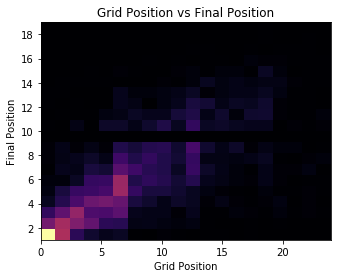

In [247]:
# Instead I decided to use a heatmap in order to show each block a little more clear. Allows us to see the amount of 
# drivers instead of just a green dot. 

import numpy as np
import numpy.random
import matplotlib.pyplot as plt

heatmap, xedges, yedges = np.histogram2d(FinalData['grid'], FinalData['positionOrder'], bins=(20))
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.clf()
plt.imshow(heatmap.T, extent=extent, origin='lower', cmap='inferno')
plt.title('Grid Position vs Final Position')
plt.xlabel('Grid Position')
plt.ylabel('Final Position')
plt.ylim(1)
plt.xlim(0)
plt.show()